Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [65]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,8

import matplotlib.pyplot as plt
import pandas as pd

In [66]:
data = pd.read_csv('tmdb_5000_movies.csv')
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Обычная гистограмма для понимания распределения значений рейтингов.

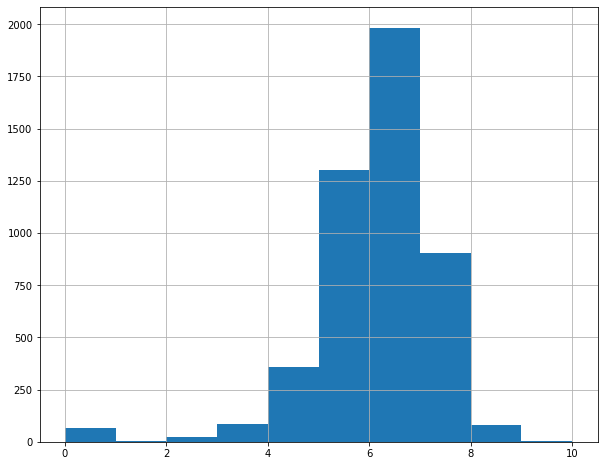

In [67]:
data.vote_average.hist()

In [68]:
runtime_data = data[[x for x in data.columns if 'runtime' in x] + ['release_date']]\
    .groupby('release_date').mean()
runtime_data.head()

,runtime
release_date,
1916-09-04,197.0
1925-11-05,151.0
1927-01-10,153.0
1929-01-30,109.0
1929-02-08,100.0


Смотрим на протяжении всего временного периода времени значения длительности фильма. Можно сделать вывод, что она не слишком меняется со временем, но последние годы короткометражки становятся все более частым явлением.

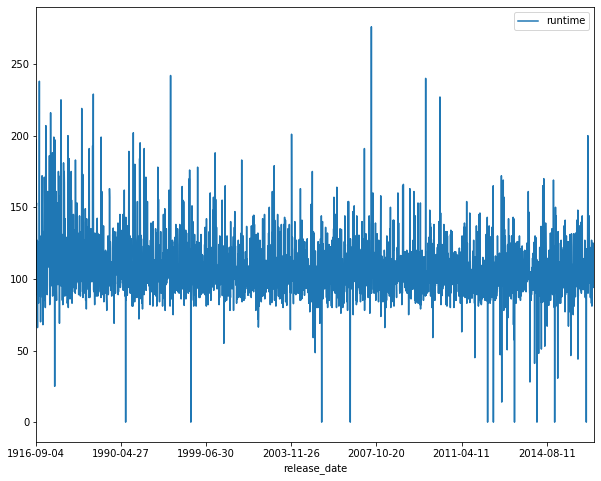

In [69]:
runtime_data.plot()

In [70]:
lang_data = data[[x for x in data.columns if 'budget' in x] + ['original_language']]\
    .groupby('original_language').mean().reset_index(level=0, drop=False).sort_values('budget', ascending=False).head(10)
lang_data.head()

,original_language,budget
31,te,4.000000e+07
7,en,3.039436e+07
36,zh,2.202560e+07
17,ja,1.429361e+07
18,ko,1.429091e+07


Топ 10 наиболее бюджетируемых языков в кино. Для рейтингов гистограммы различных видов весьма наглядны.

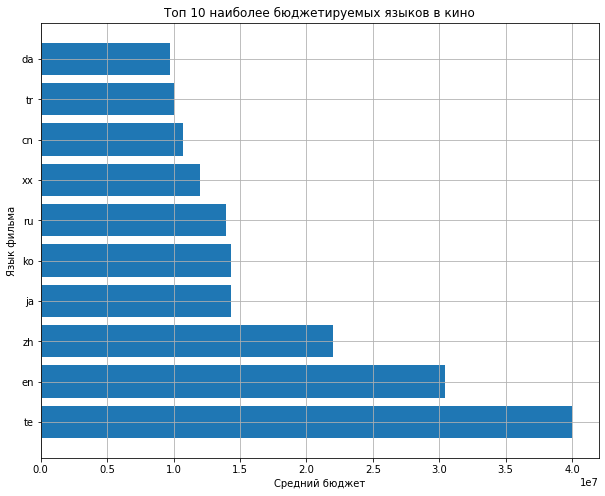

In [60]:
plt.barh(lang_data['original_language'], lang_data['budget'])
plt.xlabel('Средний бюджет')
plt.ylabel('Язык фильма')
plt.title('Топ 10 наиболее бюджетируемых языков в кино')
plt.text(200000, 0.5, '')
plt.grid()

In [52]:
import seaborn as sns

Pair plot для понимания, как корелируют популярность, средняя оценка и прибыль с фильма. Можно увидеть, что фильмы с оценкой выше 5 имеют больший финансовый успех и популярность.

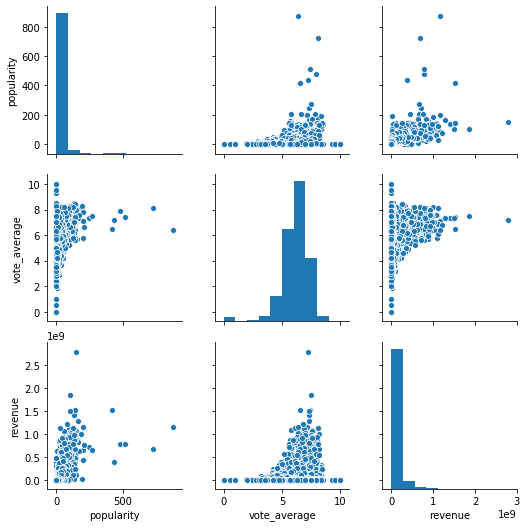

In [72]:
sns_plot = sns.pairplot(
    data[['popularity', 'vote_average', 'revenue']])
sns_plot

Более детально смотрим кореляцию 2х величин - средняя оценка и кассовые сборы.На данном графике видно, что в укрупненном варианте скорее после оценки 4 идет увеличение кассовых сборов.

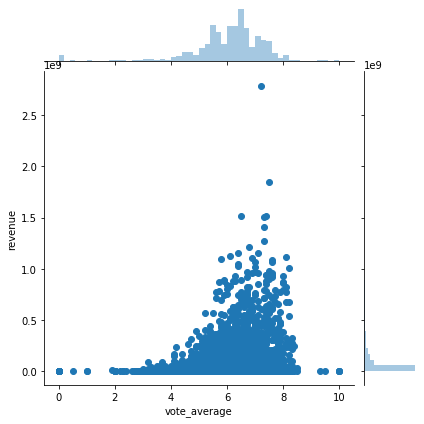

In [73]:
sns.jointplot(x='vote_average', y='revenue', 
              data=data, kind='scatter')

In [ ]:
Еще один вариант посмотреть распределение дилтельности фильма.

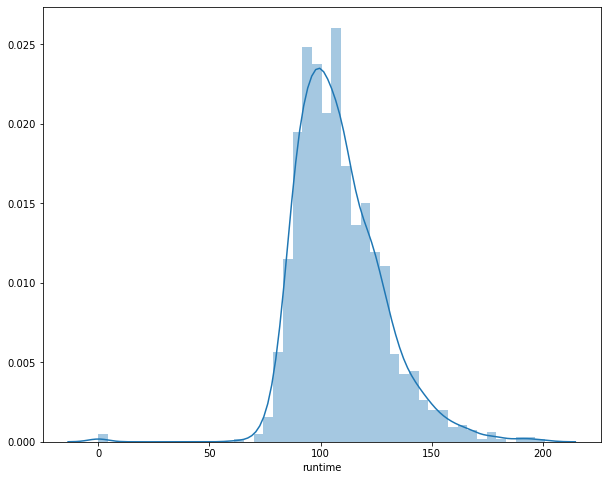

In [76]:
sns.distplot(data.dropna().runtime)